In [1]:
#I connected drive to read rar file properly
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unrar
#!unrar x "/content/drive/MyDrive/Dataset.rar" "/content/drive/MyDrive/"

In [3]:
#some importan libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#firstly, i read data and i stored it df dataframe
df=pd.read_csv("/content/drive/MyDrive/Dataset/data.csv",delimiter=";")
#lets look at some part of our data
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [5]:
#I should know how many rows and columns in data, so I checked it
df.shape

(9471, 17)

In [6]:
#so I have 9471 rows and 17 columns in data
#sometimes there are columns in the data that contain too many null values. So let's check this out
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [7]:
#When I look at this output, I see that the last two columns consist of only null values. Then let's delete these columns directly
#I see that there are not many null values ​​in the other columns. That's why I won't delete those columns, then I fill in the null values ​​according to the columns.
df.drop(columns=["Unnamed: 15","Unnamed: 16"],inplace=True)

In [8]:
#then, I have 15 columns in data
df.shape

(9471, 15)

In [9]:
#now let's look at a histogram graph of the columns
df.hist(figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1886539d0>,
      dtype=object)

In [10]:
#When I look at these histogram graphs, I see how the data in the columns is distributed.
# While some columns are distributed in certain ranges, they also have some outliers.
#lets check our data again
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

In [11]:
#I see some comma numbers in our data as well as date and time data. In order to examine the data more easily or to make comparisons,
# I must perform conversions to the same data type.So let's look at our data types
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [12]:
#I see that the data consists of object and float data types.
# I have to convert number data from object data type to float data type. I am doing this here
df['CO(GT)'] = df['CO(GT)'].str.replace(",",".").astype(float)
df["PT08.S1(CO)"]=df["PT08.S1(CO)"].astype(float)
df["C6H6(GT)"]=df["C6H6(GT)"].str.replace(",",".").astype(float)
df["T"]=df["T"].str.replace(",",".").astype(float)
df["RH"]=df["RH"].str.replace(",",".").astype(float)
df["AH"]=df["AH"].str.replace(",",".").astype(float)

In [13]:
#conversion of date and time type
df["Date"]=df["Date"].str.replace("/","").astype(float)
df["Time"]=df["Time"].str.replace(".00.00","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#When I look at the data types again, I see that the conversions have taken place.
df.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [15]:
#lets see how our data changes
df.head()

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0  10032004.0  18.0     2.6       1360.0     150.0      11.9         1046.0   
1  10032004.0  19.0     2.0       1292.0     112.0       9.4          955.0   
2  10032004.0  20.0     2.2       1402.0      88.0       9.0          939.0   
3  10032004.0  21.0     2.2       1376.0      80.0       9.2          948.0   
4  10032004.0  22.0     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [16]:
#I'm filling in any remaining null values ​​in the data with the means of the columns
for i in df.columns:
  df[i].fillna((df[i].mean()), inplace=True)
df.isna().sum()
#now, there is no null values

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [17]:
#Let's check how many unique values ​​are in individual columns
for i in df.columns:
  print(df[i].nunique())

392
25
98
1043
431
409
1247
927
1223
285
1605
1745
438
755
6685


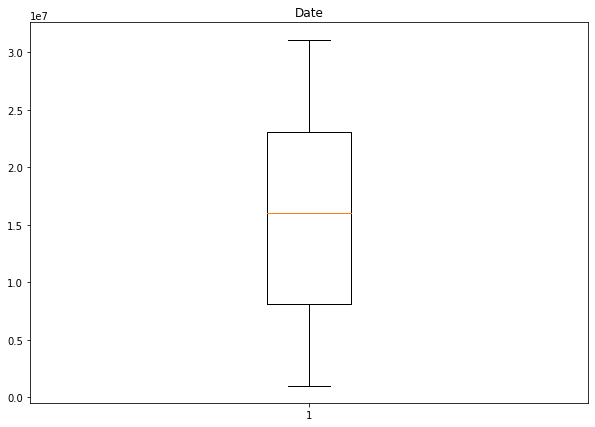

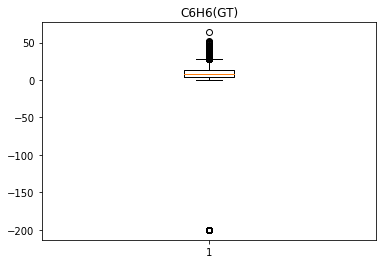

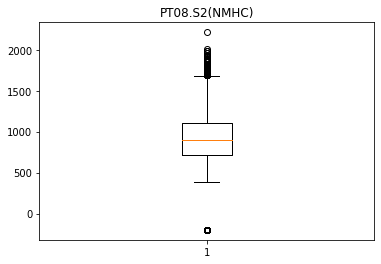

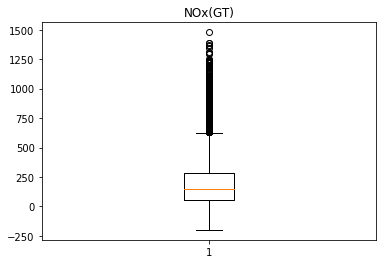

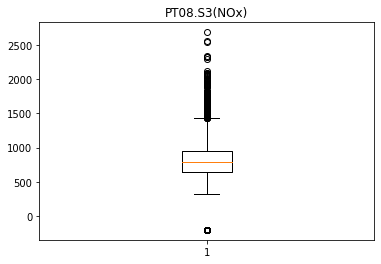

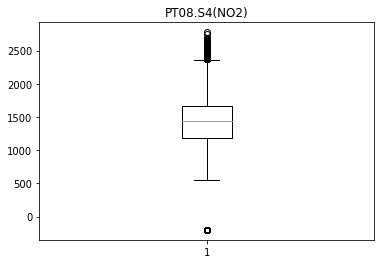

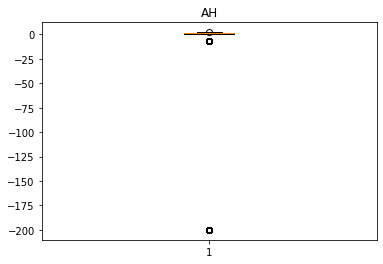

In [18]:
#now i need boxplots for data. Boxplot shows me which data has outlier values
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
for i in df.columns:
  plt.boxplot(df[i])
  plt.title(i)
# show plot
  plt.show()

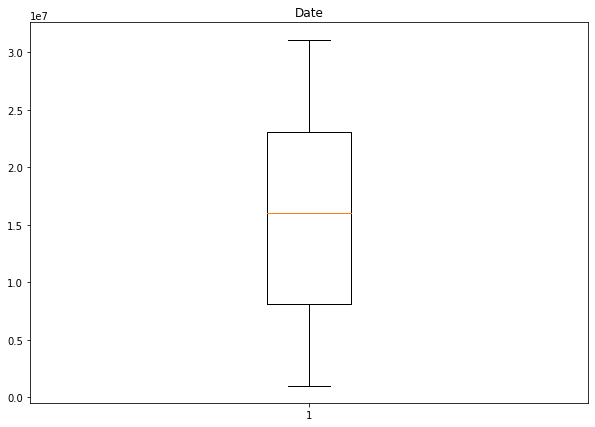

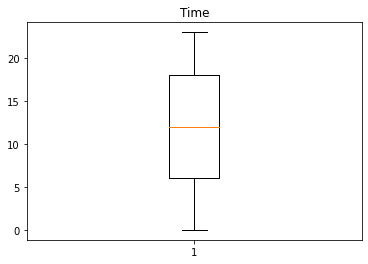

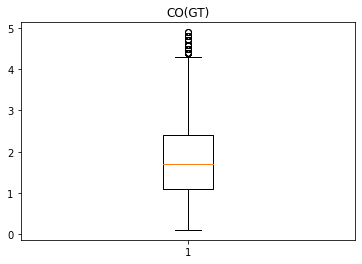

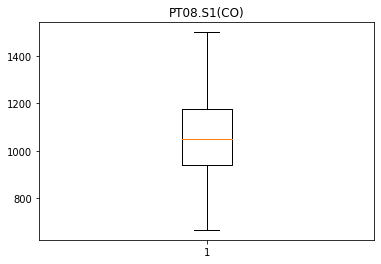

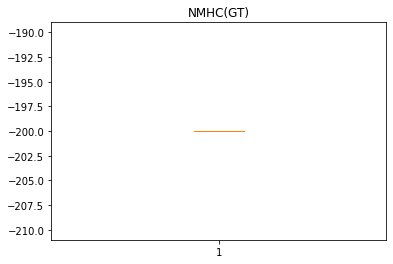

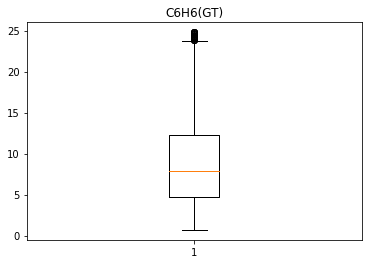

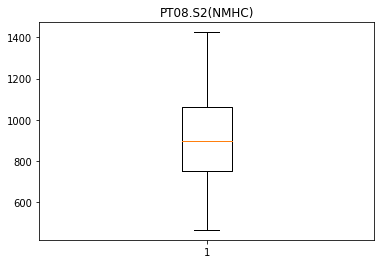

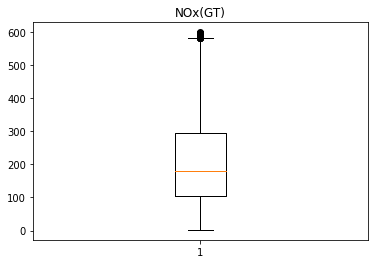

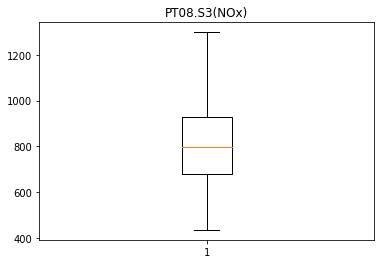

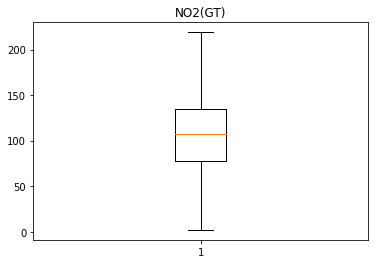

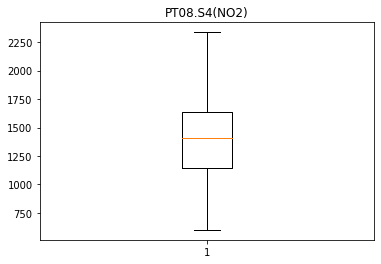

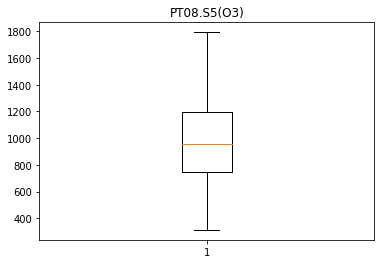

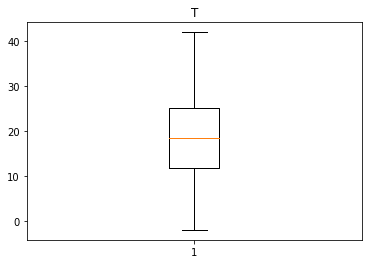

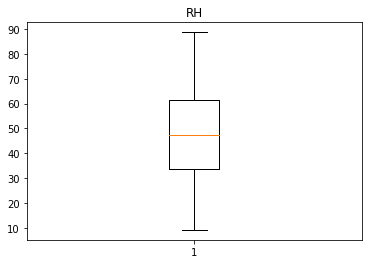

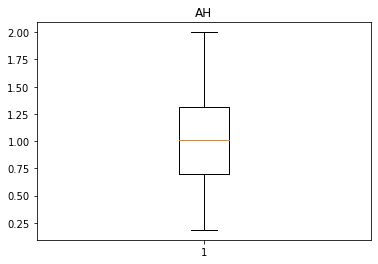

In [19]:
#I conditioned it by adding some bounds to our data to get rid of the outlier values
df1=df[(df["CO(GT)"]>-10)& (df["CO(GT)"]<5)& (df["PT08.S1(CO)"]<1500)& (df["NMHC(GT)"]<0)&(df["C6H6(GT)"]<25) & (df["PT08.S2(NMHC)"]<1700)
&(df["NOx(GT)"]<600) & (df["PT08.S3(NOx)"]<1300) & (df["PT08.S4(NO2)"]<2400) &(df["NO2(GT)"]<220) & (df["NO2(GT)"]>-10)
 & (df["PT08.S5(O3)"]<1800) & (df["AH"]>-10) & (df["AH"]<2) & (df["RH"]>-10) & (df["T"]>-20) & (df["T"]<42)]
fig = plt.figure(figsize =(10, 7))
#Now we look at the boxplots again and see the change in the data more clearly.
for i in df1.columns:
  plt.boxplot(df1[i])
  plt.title(i)
  plt.show()

In [20]:
#now I can look at the relation of the columns to each other in the data that has been edited, typed and outlier values ​​have been deleted.
#correlation table shows me that
df.corr()

Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Date           1.000000  0.000849 -0.033206     0.014908  0.062675  0.033637   
Time           0.000849  1.000000  0.075984     0.196780  0.049371  0.046087   
CO(GT)        -0.033206  0.075984  1.000000     0.041411  0.128351 -0.031378   
PT08.S1(CO)    0.014908  0.196780  0.041411     1.000000  0.170007  0.852687   
NMHC(GT)       0.062675  0.049371  0.128351     0.170007  1.000000  0.037323   
C6H6(GT)       0.033637  0.046087 -0.031378     0.852687  0.037323  1.000000   
PT08.S2(NMHC)  0.008187  0.282315  0.029926     0.933102  0.110104  0.767433   
NOx(GT)        0.006093  0.225153  0.526451     0.277993 -0.004427 -0.001174   
PT08.S3(NOx)   0.041959 -0.256172 -0.089981     0.087019  0.048821  0.512193   
NO2(GT)        0.034556  0.219483  0.671127     0.154030  0.103307 -0.010992   
PT08.S4(NO2)  -0.003227  0.147978 -0.073724     0.845149  0.162680  0.774673   
PT08.S5(O3)   -0.008384  0.198014  0.080310     0.892434  0.101185  0.641334   
T              0.029338  0.027230 -0.068939     0.754844 -0.000009  0.971375   
RH             0.028156 -0.108776 -0.048227     0.745375  0.008284  0.925062   
AH             0.035691 -0.013763 -0.045892     0.764903  0.012500  0.984555   

               PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
Date                0.008187  0.006093      0.041959  0.034556     -0.003227   
Time                0.282315  0.225153     -0.256172  0.219483      0.147978   
CO(GT)              0.029926  0.526451     -0.089981  0.671127     -0.073724   
PT08.S1(CO)         0.933102  0.277993      0.087019  0.154030      0.845149   
NMHC(GT)            0.110104 -0.004427      0.048821  0.103307      0.162680   
C6H6(GT)            0.767433 -0.001174      0.512193 -0.010992      0.774673   
PT08.S2(NMHC)       1.000000  0.331272     -0.073667  0.176488      0.874782   
NOx(GT)             0.331272  1.000000     -0.436084  0.817139      0.035546   
PT08.S3(NOx)       -0.073667 -0.436084      1.000000 -0.256232      0.122734   
NO2(GT)             0.176488  0.817139     -0.256232  1.000000     -0.022174   
PT08.S4(NO2)        0.874782  0.035546      0.122734 -0.022174      1.000000   
PT08.S5(O3)         0.909905  0.461889     -0.208865  0.253439      0.723690   
T                   0.669025 -0.138452      0.588111 -0.084104      0.755060   
RH                  0.585803 -0.053009      0.573549 -0.081305      0.640707   
AH                  0.646572 -0.095847      0.621618 -0.060440      0.691913   

               PT08.S5(O3)         T        RH        AH  
Date             -0.008384  0.029338  0.028156  0.035691  
Time              0.198014  0.027230 -0.108776 -0.013763  
CO(GT)            0.080310 -0.068939 -0.048227 -0.045892  
PT08.S1(CO)       0.892434  0.754844  0.745375  0.764903  
NMHC(GT)          0.101185 -0.000009  0.008284  0.012500  
C6H6(GT)          0.641334  0.971375  0.925062  0.984555  
PT08.S2(NMHC)     0.909905  0.669025  0.585803  0.646572  
NOx(GT)           0.461889 -0.138452 -0.053009 -0.095847  
PT08.S3(NOx)     -0.208865  0.588111  0.573549  0.621618  
NO2(GT)           0.253439 -0.084104 -0.081305 -0.060440  
PT08.S4(NO2)      0.723690  0.755060  0.640707  0.691913  
PT08.S5(O3)       1.000000  0.503700  0.524955  0.519467  
T                 0.503700  1.000000  0.885911  0.981001  
RH                0.524955  0.885911  1.000000  0.943995  
AH                0.519467  0.981001  0.943995  1.000000

In [21]:
#When I examine the relationship of the columns to each other, I see that several columns are almost 100% similar to each other.
# These are C6H6(GT) -AH and AH-T. Therefore, it is best to reduce the data by deleting the AH column.(reduction)
df1.drop(columns=["AH"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Now we need to normalize the data and bring it to a certain number range. This will be very useful when we train the data with a model in the future.
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df1)
print(scaled)
#nereye tablo ekleyebiliyorsan ekle!!
#bol bol yorum ekle

[[0.56563641 0.47826087 0.5625     ... 0.84797297 0.51826484 0.31698113]
 [0.56563641 0.52173913 0.4375     ... 0.71689189 0.58675799 0.23899371]
 [0.56563641 0.56521739 0.4375     ... 0.64527027 0.59589041 0.24528302]
 ...
 [0.10069791 0.52173913 0.47916667 ... 0.52635135 0.65753425 0.11446541]
 [0.10069791 0.56521739 0.41666667 ... 0.30878378 0.68949772 0.05408805]
 [0.10069791 0.60869565 0.4375     ... 0.33986486 0.69406393 0.0490566 ]]


In [23]:
#Now we have made the data ready for model training. We have done all the necessary operations on the data.
# The data preprocessing part is finished here. The following sections will vary depending on how and on what basis we train the data.
